#### A. Purpose: EXPLORATORY DATA ANALYSIS

In [1]:
%run 00_project_setup.ipynb
%run 01_data_import.ipynb   

c:\Users\User\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In this stage of the project, I conduct an Exploratory Data Analysis (EDA) on the student.csv dataset to gain a comprehensive understanding of its structure and characteristics. This involves identifying patterns, trends, and relationships within the data, as well as examining potential irregularities such as outliers, missing values, and duplicate records. Performing EDA is a crucial step, as it not only simplifies the subsequent preprocessing tasks but also provides valuable insights that guide feature engineering and inform the selection of appropriate machine learning algorithms. Additionally, this analysis helps assess data quality, detect any biases, and highlight variables that may significantly influence model performance.

In [2]:
class EXPLOREDATA:
    '''
        This class is used to perform exploratory data analysis and has the following methods : 
        - infodata : gain information about the data set. 
        - sumarry_statistics : This methods provide descriptive summary statistics about the data set.
        - features_data_types : This function provides the data type for every columns in th dataframe.
        - dataframe_shape : This methods returns the shape of 
    '''
    def __init__(self , rawdata):
        self.rawdata = rawdata

    def infodata(self) :
        return self.rawdata.info()

    def sumarry_statistics(self):
        # Make pandas display all columns
        pd.set_option('display.max_columns', None)
        return self.rawdata.describe()

    def features_data_types(self):
        return self.rawdata.dtypes

    def dataframe_shape(self):
        return self.rawdata.shape

    def corre_heatmap(self):
        SAVE_PATH = os.path.join("..","outputs", "figures", "correlation_heatmap.png")
        
        numerical_features = self.rawdata.select_dtypes(include=['int64', 'float64']).columns
        correlation_matrix = self.rawdata[numerical_features].corr()
        # Create clustered heatmap
        cluster = sns.clustermap(
            correlation_matrix,
            cmap='coolwarm',
            annot=False,
            figsize=(14, 10)
        )
        # Add title
        cluster.fig.suptitle("Correlation Heatmap", fontsize=16)
            # Save figure
        cluster.fig.savefig(SAVE_PATH, dpi=300, bbox_inches='tight')

        plt.show()

###### INSTANTIATE THE CLASS : 

In [3]:
exploredata_df = EXPLOREDATA(x)

###### A.1 Dataset Overview

In [4]:
exploredata_df.infodata()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

From above the dataset contains 4,424 student records with 36 features, all numeric (29 integers, 7 floats) and fully populated, indicating high data quality with no missing values. It includes demographic and socio-economic information (e.g., age, gender, parents’ qualifications, scholarship status), academic background and admission details (previous qualifications, admission grades, course type), semester-wise curricular performance (credits, enrollments, approvals, grades), and macroeconomic indicators (GDP, inflation, unemployment rate). Many categorical variables are already integer-encoded, while continuous features such as grades and economic indicators may require scaling for some machine learning models. The dataset’s target variable is a three-class classification task (e.g., dropout, average, success), with a likely class imbalance. Feature engineering opportunities include computing semester pass rates or average grades, and modeling should account for socio-economic and academic interactions, handle potential outliers, and address class imbalance through weighting or resampling techniques.

###### A.2 summary statistics   

In [5]:
exploredata_df.sumarry_statistics()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


From the above summary statistics of the feature we observe the following : 

- Marital Status: Most students are single, with the values ranging from 1 to 6, and a mean of 1.18 and median of 1, indicating a heavily skewed distribution toward single students.

- Application Mode: The application mode ranges from 1 to 57, with a mean of 18.67 and median of 17, reflecting considerable variability and likely different admission pathways.

- Application Order: Application order varies from 0 to 9, with a median of 1, showing that most students applied early, while a few applied later.

- Course: Course codes range from 33 to 9991, with a median of 9238, representing a wide variety of undergraduate programs.

- Daytime/Evening Attendance: Most students attend daytime classes, as indicated by the binary distribution (0–1) and a mean of 0.89.

- Previous Qualification: Previous qualifications range from 1 to 43, with a mean of 4.58 and median of 1, suggesting that most students have basic prior qualifications, though a few outliers exist.

- Previous Qualification (Grade): Grades for previous qualifications range from 95 to 190, with a mean of 132.6 and median of 133.1, indicating a fairly symmetric distribution.

- Nationality: Nationality is numerically encoded between 1 and 109, with a mean of 1.87 and median of 1, meaning most students share the same nationality code.

- Mother’s Qualification: Mother’s qualifications range from 1 to 44, with a median of 19, showing a wide spread among parental education levels.

- Father’s Qualification: Father’s qualifications also range from 1 to 44, with a median of 19, indicating similar variability as mothers’ qualifications.

- Mother’s Occupation: Mother’s occupation values range from 0 to 194, with a median of 4, suggesting high diversity in maternal employment types.

- Father’s Occupation: Father’s occupation ranges from 0 to 195, with a median of 7, indicating similarly diverse paternal employment backgrounds.

- Admission Grade: Admission grades vary between 95 and 190, with a mean of 126.98, reflecting students’ entry-level academic performance.

- Displaced: Approximately half of the students are classified as displaced, with a binary range of 0–1 and a mean of 0.55.

- Educational Special Needs: Very few students have educational special needs, as indicated by a binary range of 0–1 and a mean of 0.01.

- Debtor: A small proportion of students have unpaid debts, with values ranging from 0–1 and a mean of 0.11.

- Tuition Fees Up to Date: Most students are up to date with tuition payments, reflected by a binary mean of 0.88.

- Gender: About 35% of students are female, assuming 1 represents female, with a binary range of 0–1 and a mean of 0.35.

- Scholarship Holder: Around one-quarter of students receive scholarships, with a binary range of 0–1 and a mean of 0.25.

- Age at Enrollment: Students’ ages range from 17 to 70, with a mean of 23.27 and a median of 20, indicating that most students are young adults, with some older outliers.

- International: Very few students are international, as shown by the binary range of 0–1 and a mean of 0.02.

- Curricular Units 1st Semester (Credited): Credited units range from 0 to 20, with a median of 0, showing that some students did not earn credits in the first semester.

- Curricular Units 1st Semester (Enrolled): Enrolled units range from 0 to 26, with a median of 6, indicating the typical number of courses taken.

- Curricular Units 1st Semester (Evaluations): Evaluations range from 0 to 45, with a median of 5, reflecting assessment opportunities for students.

- Curricular Units 1st Semester (Approved): Approved units range from 0 to 26, with a median of 5, showing the number of successfully completed courses.

- Curricular Units 1st Semester (Grade): Grades for the first semester range from 0 to 18.875, with a median of 12.29, representing overall student performance.

- Curricular Units 1st Semester (Without Evaluations): Units without evaluations range from 0 to 12, with a median of 0, indicating most students had evaluations for their courses.

- Curricular Units 2nd Semester (Credited): Credited units for the second semester range from 0 to 20, similar to the first semester, indicating consistent course structure.

- Curricular Units 2nd Semester (Enrolled): Enrolled units range from 0 to 19, with a median of 6, reflecting student engagement in the second semester.

- Curricular Units 2nd Semester (Evaluations): Evaluations range from 0 to 23, showing assessment activity in the second semester.

- Curricular Units 2nd Semester (Approved): Approved units range from 0 to 33, with a median of 10.75, indicating progress or improvement for some students.

- Curricular Units 2nd Semester (Grade): Grades range from 0 to 18.571, similar to the first semester, showing overall performance.

- Unemployment Rate: Values range from 0 to 18.57, with a mean of 11.57, representing the economic context during enrollment.

- Inflation Rate: Inflation ranges from -0.8 to 3.7, with a mean of 1.23, reflecting small variations in economic conditions.

- GDP: GDP growth ranges from -4.06 to 3.51, with a mean near zero, showing minimal impact on the student population overall.

###### A.3 shape of the DataFrame  

In [6]:
exploredata_df.dataframe_shape()

(4424, 36)

As seen above , the dataframe has 768 observation and 9 features. 

###### A.4 Feature Correlation Heatmap

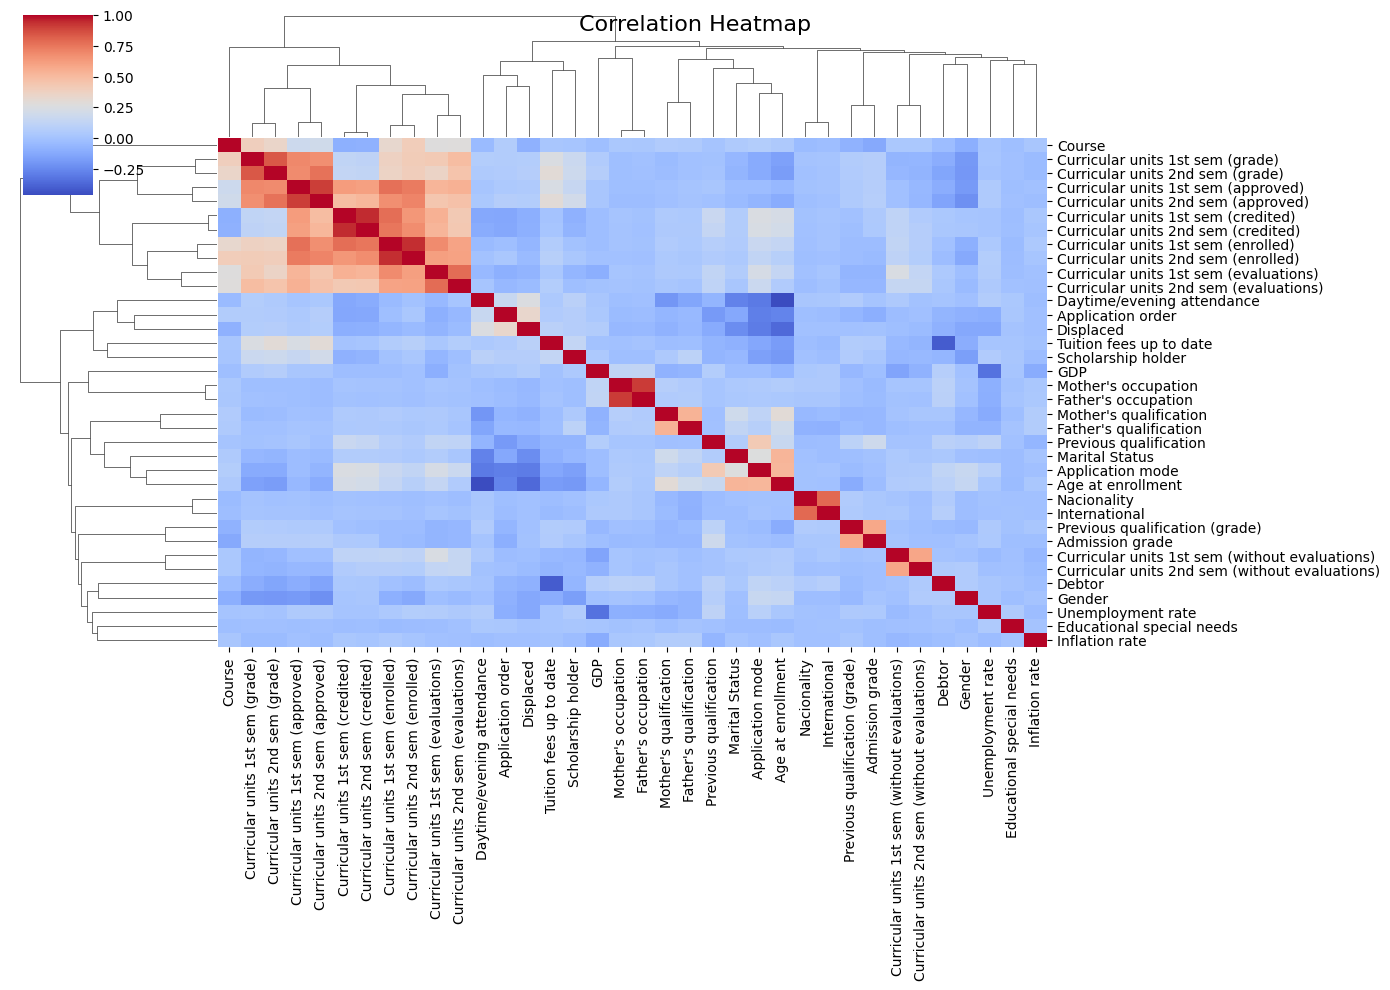

In [7]:
exploredata_df.corre_heatmap()

From the above heatmap, we can observe that there are no strong correlations between the features. The correlation heatmap with hierarchical clustering reveals that academic performance indicators (grades, approved, credited, enrolled, and evaluated curricular units in both 1st and 2nd semesters) are extremely highly intercorrelated (r > 0.75–0.95), forming a distinct high-performance cluster, while most socio-demographic variables (parental education/occupation, gender, nationality, age, marital status, etc.) show very weak or negligible correlations with academic success (|r| < 0.2). The strongest negative predictor of grades and course progression is “Debtor” status (r ≈ –0.6 to –0.7), followed by macroeconomic factors (unemployment and inflation rates), whereas “Scholarship holder” and “Tuition fees up to date” are the clearest positive predictors (moderate to strong positive correlations). Hierarchical clustering confirms two major variable groups: (1) academic progress metrics and (2) background/financial factors, highlighting that in this dataset, financial barriers and support are far more decisive for student success than traditional demographic or family-background characteristics. This indicates that each feature contributes unique information to the dataset, which is beneficial for building robust predictive models

###### A.5 FEATURE DISTRIBUTION : 

In [8]:
%matplotlib inline

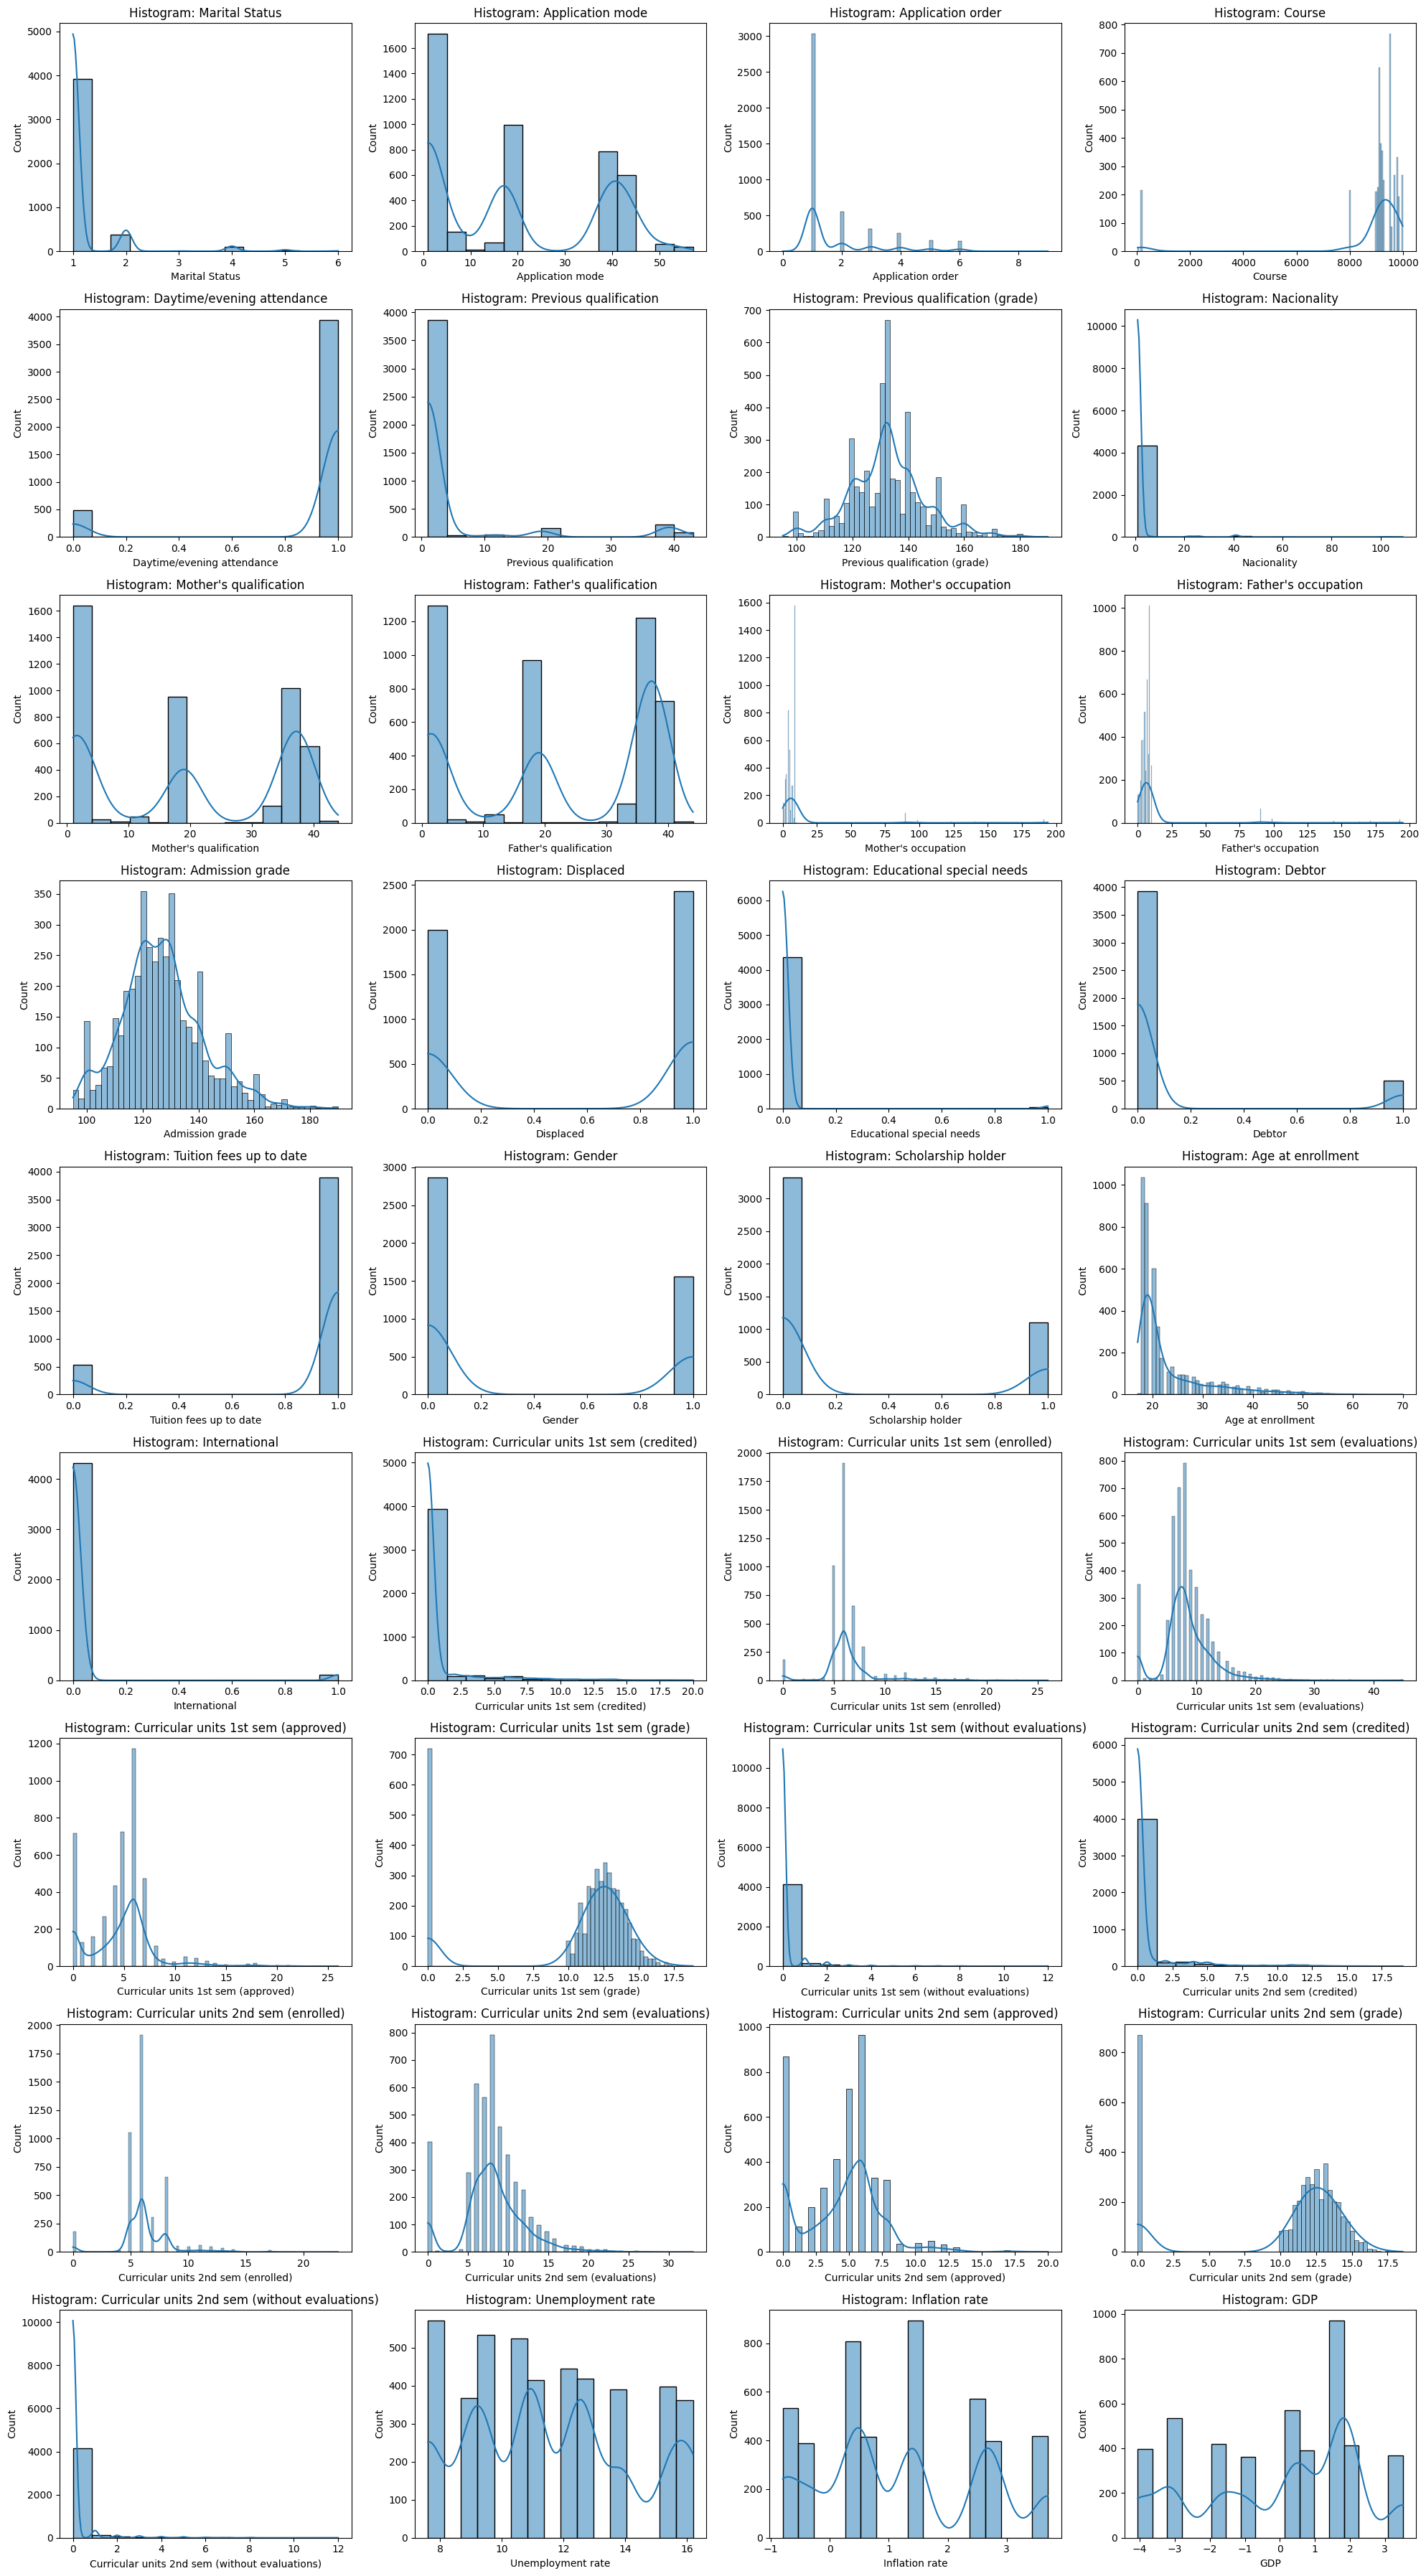

In [9]:
draw_histograms(x)

- Marital status: Extremely imbalanced; >90% are single (code 1), very few married/divorced/widowed.
- Application mode: Highly skewed toward a few dominant modes (codes ~1, 17, 39), many categories almost empty.
- Application order: Strongly skewed toward 1st choice (value 1 dominates), higher orders very rare.
- Course: Very uneven distribution; one or two programs dominate, several courses have tiny enrollment.
- Daytime/evening attendance: Heavily skewed toward daytime (0); evening classes are a small minority.
- Previous qualification: Overwhelmingly secondary education (code 1), other qualifications almost negligible.
- Previous qualification (grade): Roughly normal, centered around 130–140, slight left skew.
- Nationality: Almost entirely Portuguese (code 1), international students <2%.
- Mother’s qualification: Strongly concentrated on basic/secondary education (codes 1–3), higher education rare.
- Father’s qualification: Similar to mother, even more concentrated on low education levels.
- Mother’s occupation: Multimodal, peaks at low-skill/student/household categories.
Father’s occupation: Similar multimodal pattern, heavy presence of low-skill/manual jobs.
- Admission grade: Approximately normal, centered ~125–135, slight left skew.
- Displaced: Moderately imbalanced (~60–70% not displaced).
- Educational special needs: Extremely rare (<1% have special needs).
- Debtor: Strong class imbalance; ~85–90% are not debtors.
- Tuition fees up to date: Highly imbalanced; majority have fees paid, ~15–20% in arrears. Gender: Roughly balanced (slightly more females).
- Scholarship holder: Severe imbalance; only ~20–25% receive scholarships.
- Age at enrollment: Heavily right-skewed; most enroll 18–20, long tail up to 50+. International: Almost identical to Nationality; >98% domestic students.
- Curricular units 1st/2nd sem (credited, enrolled, evaluations, approved, grade): All strongly right-skewed or bimodal, with large spikes at 0 (failures/dropouts) and high values (successful students).
Inflation rate: Multimodal, year-dependent pattern.
- GDP: Multimodal, clearly reflects economic cycles across enrollment cohorts.

These highly skewed, imbalanced, and multimodal distributions confirm the necessity of robust preprocessing (e.g., log/yeo-johnson transformation, target encoding, or SMOTE-type balancing) for reliable predictive modeling.





##### CONCLUDSION :
From the above Exploratory data Analysis :

- The dataframe has 4424 entries and 36 features/variable, all numeric data type.
- The dataframe is complete with no missing value.
- There exist relationships between the features.
- Most features are not normally distributed because of the presence of ouliers as already observed in the data assessment section.